In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
from models.RL_model import RLModel
from stable_baselines3 import PPO, DQN
from environments.rush_hour_env import RushHourEnv
from environments.rush_hour_image_env import RushHourImageEnv
from utils.analyze_logs import analyze_logs
from GUI.visualizer import run_visualizer
import multiprocessing
from stable_baselines3.common.env_util import make_vec_env 

from utils.config import MODEL_DIR, LOG_DIR, VIDEO_DIR, VIDEO_PATH, NUM_VEHICLES

In [3]:
def init_model(model_class, early_stopping=True, cnn=False):
    MODEL_DIR.mkdir(parents=True, exist_ok=True)
    LOG_DIR.mkdir(parents=True, exist_ok=True)
    VIDEO_DIR.mkdir(parents=True, exist_ok=True)

    # Unique run ID
    run_id = f"run_{int(time.time())}"
    model_name = f"{model_class.__name__}_{'CNN' if cnn else 'MLP'}_{'early' if early_stopping else 'full'}_{run_id}.zip"
    model_path = MODEL_DIR / model_name
    log_file = LOG_DIR / f"{model_name}.csv"

    # CHANGED: wrap the environment in a VecEnv spanning all CPU cores
    if cnn:
        train_env = make_vec_env(
            lambda: RushHourImageEnv(num_of_vehicle=NUM_VEHICLES, train=True),
            n_envs=N_CPU
        )
    else:
        train_env = make_vec_env(
            lambda: RushHourEnv(num_of_vehicle=NUM_VEHICLES, train=True),
            n_envs=N_CPU
        )

    # Create model wrapper
    model = RLModel(
        model_class,
        train_env,
        model_path=model_path,
        log_file=log_file,
        early_stopping=early_stopping,
        cnn=cnn,
    )
    return model


In [4]:
def train_model(model):
    print("🚀 Training the model...")
    model.train()
    model.save()
    return model.model_path


In [5]:
def evaluate_model(model):
    print("🚀 Evaluating the model...")
    if model.cnn:
        test_env = RushHourImageEnv(num_of_vehicle=NUM_VEHICLES, train=False)
    else:
        test_env = RushHourEnv(num_of_vehicle=NUM_VEHICLES, train=False)
    model.evaluate(test_env)


In [6]:
def analyze_training_logs(logs_files):
    print("\n📊 Analyzing training logs...")
    analyze_logs(logs_files)
    print("✅ Log analysis completed. Plots displayed.")


In [7]:
def visualize_and_save(model_path, video_path=VIDEO_PATH):
    print("\n🎥 Generating and saving visualization...")
    run_visualizer(model_path, record=True, output_video=str(video_path))
    print(f"✅ Video saved at: {video_path}")


In [8]:
N_CPU = multiprocessing.cpu_count()
log_files = []
models_path = []

# CNN

## CNN PPO es

In [ ]:

cnn_model_es = init_model(PPO, True, True)
train_model(cnn_model_es)


🧠 Initializing PPO model...
Using cpu device


In [ ]:
evaluate_model(cnn_model_es)

🚀 Evaluating the model...

🚀 Evaluating on test boards...


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.

📊 Test Evaluation Results:
✅ Solved 187/600
🏆 Success rate: 31.17%
📈 Avg reward: -18814.94
⏱️ Avg steps to solve: 52.25


In [ ]:
log_files.append(cnn_model_es.log_file)
models_path.append(cnn_model_es.model_path)

: 

## CNN PPO no es

In [ ]:
cnn_model_no_es = init_model(PPO, False, True)
train_model(cnn_model_no_es)


🧠 Initializing PPO model...
Using cpu device
🚀 Training the model...
→ multiprocessing.cpu_count() reports 12 cores
📚 Training without early stopping (logging only)...
[Episode 0] Reward: -2763.00 | Escaped: True
[Episode 1] Reward: -240288.00 | Escaped: True
[Episode 2] Reward: -147411.00 | Escaped: True
[Episode 3] Reward: -2747730.00 | Escaped: True
[Episode 4] Reward: -29430.00 | Escaped: True
[Episode 5] Reward: -134775.00 | Escaped: True
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 325       |
|    ep_rew_mean     | -5.39e+05 |
| time/              |           |
|    fps             | 458       |
|    iterations      | 1         |
|    time_elapsed    | 53        |
|    total_timesteps | 24576     |
----------------------------------


In [ ]:
evaluate_model(cnn_model_no_es)
log_files.append(cnn_model_no_es.log_file)
models_path.append(cnn_model_no_es.model_path)

# Ml PPO model

## with es

In [ ]:
ppo_model_es = init_model(PPO, True, False)
train_model(ppo_model_es)

🧠 Initializing PPO model...
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
🚀 Training the model...
📚 Training the model with early stopping and logging...
[Episode 0] Reward: -321368.00 | Escaped: True
[Episode 1] Reward: -94740.00 | Escaped: True
[Episode 2] Reward: -1188596.00 | Escaped: True
[Episode 3] Reward: -182831.00 | Escaped: True
[Episode 4] Reward: -221606.00 | Escaped: True
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 371       |
|    ep_rew_mean     | -4.02e+05 |
| time/              |           |
|    fps             | 9083      |
|    iterations      | 1         |
|    time_elapsed    | 0         |
|    total_timesteps | 2048      |
----------------------------------
[Episode 5] Reward: -102275.00 | Escaped: True
[Episode 6] Reward: -41310.00 | Escaped: True
[Episode 7] Reward: -7320646.00 | Escaped: True
[Episode 8] Reward: -1141.00 | Escaped: True
[Episode 9] Reward: -3931.0

PosixPath('models_zip/PPO_MLP_early_run_1746274609.zip')

In [ ]:
evaluate_model(ppo_model_es)

🚀 Evaluating the model...

🚀 Evaluating on test boards...
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.

📊 Test Evaluation Results:
✅ Solved 158/600
🏆 Success rate: 26.33%
📈 Avg reward: -19553.58
⏱️ Avg steps to solve: 50.90


In [ ]:
log_files.append(ppo_model_es.log_file)
models_path.append(ppo_model_es.model_path)

## without es

In [ ]:
ppo_model_no_es = init_model(PPO, False, False)
train_model(ppo_model_no_es)

In [ ]:
log_files.append(ppo_model_no_es.log_file)
models_path.append(ppo_model_no_es.model_path)

In [ ]:
log_files.append(ppo_model_no_es.log_file)
models_path.append(ppo_model_no_es.model_path)

# Ml DQN model

## with es

In [ ]:
dqn_model_es = init_model(DQN, True, False)
train_model(dqn_model_es)

🧠 Initializing DQN model...
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
🚀 Training the model...
📚 Training the model with early stopping and logging...
[Episode 0] Reward: -1809380.00 | Escaped: True
[Episode 1] Reward: -128276.00 | Escaped: True
[Episode 2] Reward: -24906.00 | Escaped: True
[Episode 3] Reward: 939.00 | Escaped: True
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 285      |
|    ep_rew_mean      | -4.9e+05 |
|    exploration_rate | 0.784    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6482     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1139     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.62e+03 |
|    n_updates        | 259      |
----------------------------------
[Episode 4] Reward: -2356593.00 | Escaped: True
[Episode 5] Reward: -173965.00 | Escaped:

PosixPath('models_zip/DQN_MLP_early_run_1746274692.zip')

In [ ]:
evaluate_model(dqn_model_es)

🚀 Evaluating the model...

🚀 Evaluating on test boards...
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.

📊 Test Evaluation Results:
✅ Solved 75/600
🏆 Success rate: 12.50%
📈 Avg reward: -27091.57
⏱️ Avg steps to solve: 49.33


In [ ]:
log_files.append(dqn_model_es.log_file)
models_path.append(dqn_model_es.model_path)

## wihtout es

In [ ]:
dqn_model_no_es = init_model(DQN, False, False)
train_model(dqn_model_no_es)

In [ ]:
evaluate_model(dqn_model_no_es)

In [ ]:
log_files.append(dqn_model_no_es.log_file)
models_path.append(dqn_model_no_es.model_path)

# Analyze


📊 Analyzing training logs...

📊 Training Summary for PPO_CNN_early_run_1746272354.zip:
Total episodes: 100
Average reward: 204.28
Max reward: 980.00
Red car escape rate: 100.0%

📊 Training Summary for PPO_MLP_early_run_1746274609.zip:
Total episodes: 99
Average reward: -1110107.04
Max reward: -1141.00
Red car escape rate: 99.0%

📊 Training Summary for DQN_MLP_early_run_1746274692.zip:
Total episodes: 68
Average reward: -3071195.49
Max reward: 994.00
Red car escape rate: 82.4%


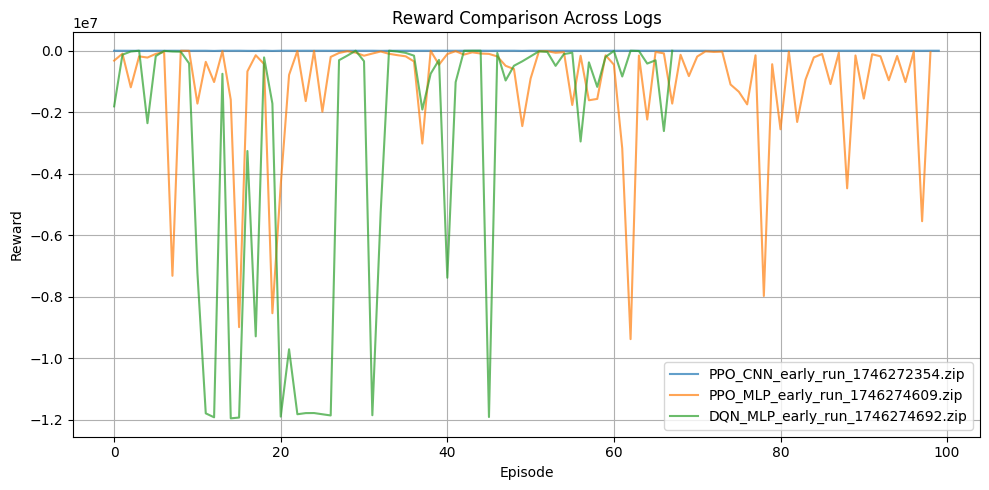

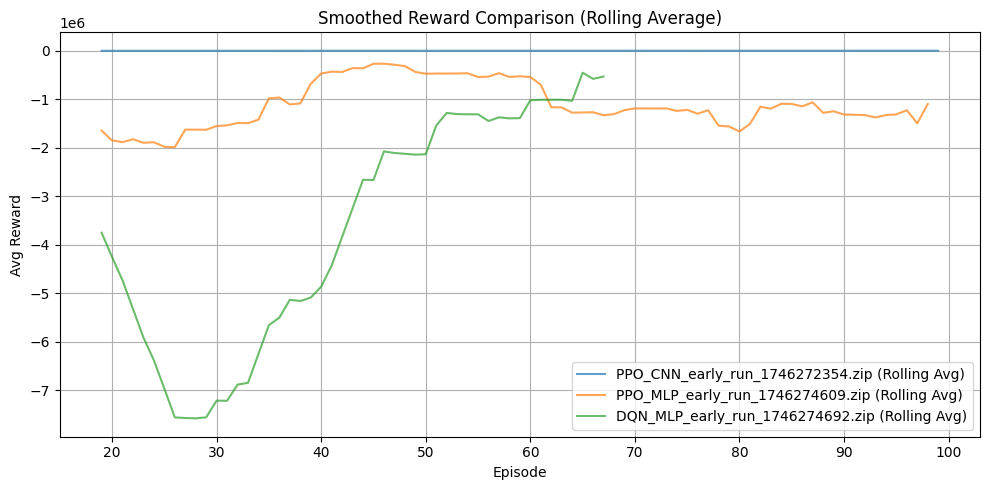

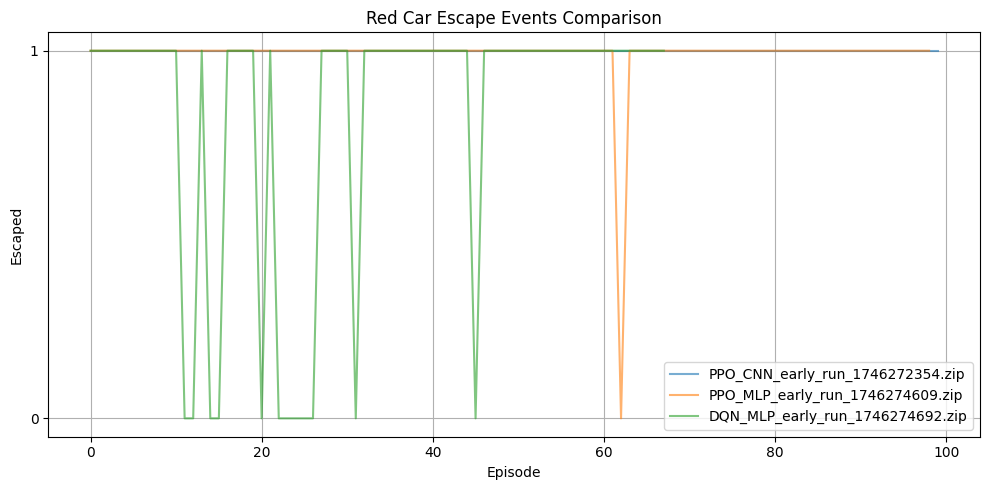

✅ Log analysis completed. Plots displayed.
✅ Log analysis completed. Plots displayed.


In [ ]:
analyze_training_logs(log_files)

In [ ]:
visualize_and_save(model)


🎥 Generating and saving visualization...
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Step 0: reward: -1
Step 1: reward: -1
Step 2: reward: -1
Step 3: reward: -6
Step 4: reward: -6
Step 5: reward: -1
Step 6: reward: -1
Step 7: reward: -6
Step 8: reward: -6
Step 9: reward: -6
Step 10: reward: -6
Step 11: reward: -6
Step 12: reward: -6
Step 13: reward: -6
Step 14: reward: -6
Step 15: reward: -6
Step 16: reward: -1
Step 17: reward: -6
Step 18: reward: -1
Step 19: reward: -6
Step 20: reward: -6
Step 21: reward: -6
Step 22: reward: -1
Step 23: reward: -6
Step 24: reward: -6
Step 25: reward: -1
Step 26: reward: -1
Step 27: reward: -6
Step 28: reward: -1
Step 29: reward: -6
Step 30: reward: -6
Step 31: reward: -6
Step 32: reward: -1
Step 33: reward: 999
✅ Escaped!
✅ Video saved to logs/videos/rush_hour_demo.mp4
✅ Video saved at: logs/videos/rush_hour_demo.mp4
